In [1]:
import os
import gc
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

# 1.) Get all image path sets
t1 = ['D:/crop/1/{}'.format(i) for i in os.listdir('D:/crop/1/')]
t1_2 = ['D:/crop/1_2/{}'.format(i) for i in os.listdir('D:/crop/1_2/')]
t1_2_5 = ['D:/crop/1_2_5/{}'.format(i) for i in os.listdir('D:/crop/1_2_5/')]
t1_2_6 = ['D:/crop/1_2_6/{}'.format(i) for i in os.listdir('D:/crop/1_2_6/')]
t1_3 = ['D:/crop/1_3/{}'.format(i) for i in os.listdir('D:/crop/1_3/')]
t1_3_5 = ['D:/crop/1_3_5/{}'.format(i) for i in os.listdir('D:/crop/1_3_5/')]
t1_4 = ['D:/crop/1_4/{}'.format(i) for i in os.listdir('D:/crop/1_4/')]
t1_5 = ['D:/crop/1_5/{}'.format(i) for i in os.listdir('D:/crop/1_5/')]
t1_5 = ['D:/crop/1_6/{}'.format(i) for i in os.listdir('D:/crop/1_6/')]

t2 = ['D:/crop/2/{}'.format(i) for i in os.listdir('D:/crop/2/')]
t2_3 = ['D:/crop/2_3/{}'.format(i) for i in os.listdir('D:/crop/2_3/')]
t2_3_4 = ['D:/crop/2_3_4/{}'.format(i) for i in os.listdir('D:/crop/2_3_4/')]
t2_3_4_5 = ['D:/crop/2_3_4_5/{}'.format(i) for i in os.listdir('D:/crop/2_3_4_5/')]
t2_3_4_8 = ['D:/crop/2_3_4_8/{}'.format(i) for i in os.listdir('D:/crop/2_3_4_8/')]
t2_3_5 = ['D:/crop/2_3_5/{}'.format(i) for i in os.listdir('D:/crop/2_3_5/')]
t2_4 = ['D:/crop/2_4/{}'.format(i) for i in os.listdir('D:/crop/2_4/')]
t2_4_5 = ['D:/crop/2_4_5/{}'.format(i) for i in os.listdir('D:/crop/2_4_5/')]
t2_5 = ['D:/crop/2_5/{}'.format(i) for i in os.listdir('D:/crop/2_5/')]
t2_5_6_8 = ['D:/crop/2_5_6_8/{}'.format(i) for i in os.listdir('D:/crop/2_5_6_8/')]
t2_6 = ['D:/crop/2_6/{}'.format(i) for i in os.listdir('D:/crop/2_6/')]
t2_6_8 = ['D:/crop/2_6_8/{}'.format(i) for i in os.listdir('D:/crop/2_6_8/')]
t2_7 = ['D:/crop/2_7/{}'.format(i) for i in os.listdir('D:/crop/2_7/')]
t2_8 = ['D:/crop/2_8/{}'.format(i) for i in os.listdir('D:/crop/2_8/')]

t3 = ['D:/crop/3/{}'.format(i) for i in os.listdir('D:/crop/3/')]
t3_4 = ['D:/crop/3/{}'.format(i) for i in os.listdir('D:/crop/3_4/')]
t3_4_5 = ['D:/crop/3_4_5/{}'.format(i) for i in os.listdir('D:/crop/3_4_5/')]
t3_4_6 = ['D:/crop/3_4_6/{}'.format(i) for i in os.listdir('D:/crop/3_4_6/')]
t3_4_8 = ['D:/crop/3_4_8/{}'.format(i) for i in os.listdir('D:/crop/3_4_8/')]
t3_5 = ['D:/crop/3_5/{}'.format(i) for i in os.listdir('D:/crop/3_5/')]
t3_5_6 = ['D:/crop/3_5_6/{}'.format(i) for i in os.listdir('D:/crop/3_5_6/')]
t3_6 = ['D:/crop/3_6/{}'.format(i) for i in os.listdir('D:/crop/3_6/')]
t3_8 = ['D:/crop/3_8/{}'.format(i) for i in os.listdir('D:/crop/3_8/')]

t4 = ['D:/crop/4/{}'.format(i) for i in os.listdir('D:/crop/4/')]
t4_5 = ['D:/crop/4_5/{}'.format(i) for i in os.listdir('D:/crop/4_5/')]

# 2.) Randomly Shuffle Images Before Splitting for Training and Testing
random.shuffle(cardboard)
random.shuffle(glass)
random.shuffle(metal)
random.shuffle(paper)
random.shuffle(plastic)
random.shuffle(trash)


# 3.) Training and Testing Image Sets
train_set = cardboard[:300] + glass[:375] + metal[:300] + paper[:450] + plastic[:360] + trash[:100]
test_set = cardboard[300:] + glass[375:] + metal[300:] + paper[450:] + plastic[360:] + trash[100:]

# 4.) Garbage Collection
del cardboard, glass, metal, paper, plastic, trash
gc.collect()

Using TensorFlow backend.


22

In [2]:
# 5.) Image Pre-Processing
nRows = 150  # Width
nCols = 150  # Height
channels = 3  # Color Channels RGB-3, Grayscale-1

# 6.) Training and Testing Set Labeling
X_train = []
X_test = []
y_train = []
y_test = []

# 7.) Read and Label Each Image in the Training Set
for image in train_set:
    try:
        X_train.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (nRows, nCols), interpolation=cv2.INTER_CUBIC))
        if 'cardboard' in image:
            y_train.append(1)
        elif 'glass' in image:
            y_train.append(2)
        elif 'metal' in image:
            y_train.append(3)
        elif 'paper' in image:
            y_train.append(4)
        elif 'plastic' in image:
            y_train.append(5)
        elif 'trash' in image:
            y_train.append(6)
    except Exception:
        print('Failed to format: ', image)

# 8.) Read and Label Each Image in the Testing Set
for image in test_set:
    try:
        X_test.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (nRows, nCols), interpolation=cv2.INTER_CUBIC))
        if 'cardboard' in image:
            y_test.append(1)
        elif 'glass' in image:
            y_test.append(2)
        elif 'metal' in image:
            y_test.append(3)
        elif 'paper' in image:
            y_test.append(4)
        elif 'plastic' in image:
            y_test.append(5)
        elif 'trash' in image:
            y_test.append(6)
    except Exception:
        print('Failed to format: ', image)

# 9.) Garbage Collection
del train_set, test_set
gc.collect()

# 10.) Convert to Numpy Arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# 11.) Switch Targets to Categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [3]:
#ResNet
from keras.applications import ResNet50
from keras.layers import Dense, Input, Activation
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
'''
input = Input(shape=(224, 224, 3))
model = ResNet50(input_tensor=input, include_top=False, weights=None, pooling='max')
 
x = model.output
x = Dense(1024, name='fully', init='uniform')(x)
x = BatchNormalization()(x)
x = dropout(0.3)(x)
x = Activation('relu')(x)
x = Dense(512, init='uniform')(x)
x = BatchNormalization()(x)
x = dropout(0.3)(x)
x = Activation('relu')(x)
x = Dense(7, activation='sigmoid', name='sigmoid')(x)

model = Model(model.input, x)
'''
#CNN
# 12.) Convolutional Neural Network
model = Sequential()
model.add(BatchNormalization(input_shape=(nRows, nCols, channels)))
model.add(Conv2D(32, kernel_size=(3, 3), activation= 'relu',padding= 'same'))
model.add(Conv2D(32, kernel_size=(3, 3), activation= 'relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.4))

model.add(Conv2D(64, kernel_size=(3, 3), activation= 'relu', padding='same'))
model.add(Conv2D(64, kernel_size=(3, 3), activation= 'relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.3))

model.add(Conv2D(128, kernel_size=(3, 3), activation= 'relu', padding='same'))
model.add(Conv2D(128, kernel_size=(3, 3), activation= 'relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

# 13.) Model Summary
print(model.summary())

# 14.) Compile and Train the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=8)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 150, 150, 3)       12        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 148, 148, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 49, 49, 64)        18496     
______________________________________

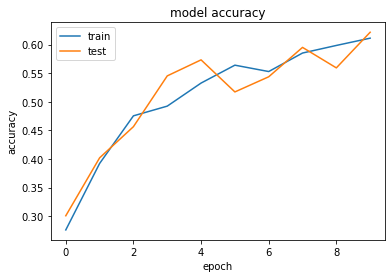

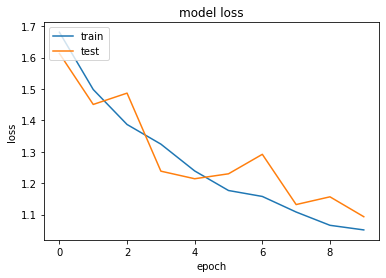

In [4]:
# 15.) Plot Accuracy Over Training Period
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 16.) Plot Loss Over Training Period
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#학습결과 저장하기
model.save_weights('Trash_Classification_CNN-weight.h5')

In [ ]:
#학습결과 불러오기
model.load_weights('Trash_Classification_CNN-weight.h5')